In [1]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import onnxruntime as ort

In [2]:
ort_session = ort.InferenceSession("docs/emnist_8693.onnx")
print(ort_session)
print(ort_session.get_inputs()[0].name)
print(ort_session.get_inputs()[0].shape)

input
['batch_size', 1, 28, 28]


In [3]:
LABELS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']

In [4]:
#  load all files starting with "tensor" and finishing as .txt
files = [f for f in os.listdir('tensors/') if os.path.isfile("tensors/"+f) and f.startswith("tensor") and f.endswith(".txt")]
print(files)
arrays = []
for f in files:
    arrays.append(np.loadtxt('tensors/' + f).reshape(1, 1, 28, 28))
print(len(arrays))
print(arrays[0].shape)

['tensor_data (4).txt', 'tensor_data (5).txt', 'tensor_data (2).txt', 'tensor_data (1).txt', 'tensor_data.txt', 'tensor_data (3).txt', 'tensor_data (2) (1).txt']
7
(1, 1, 28, 28)


In [5]:
# test all the tensors
preds = []
for i in range(len(arrays)):
    ort_inputs = {ort_session.get_inputs()[0].name: arrays[i].astype(np.float32)}
    ort_outs = ort_session.run(None, ort_inputs)
    preds.append(LABELS[np.argmax(ort_outs[0])])
print(preds)

['7', 'B', 'C', 'A', 'C', 'J', '5']


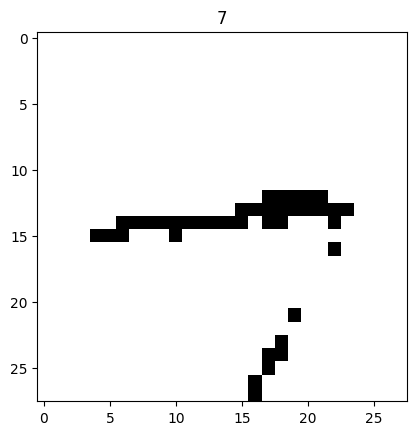

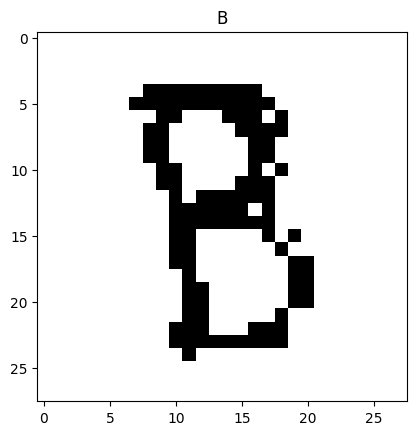

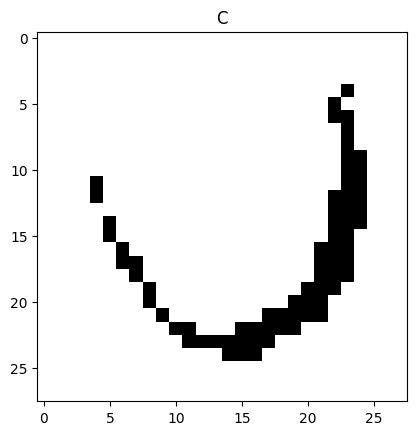

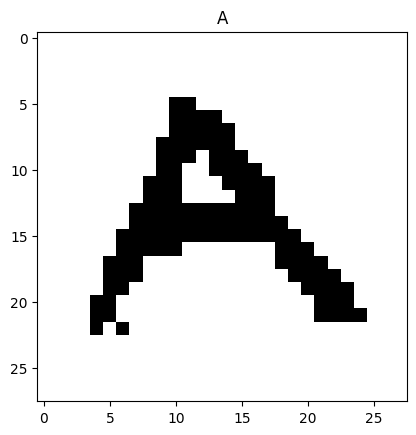

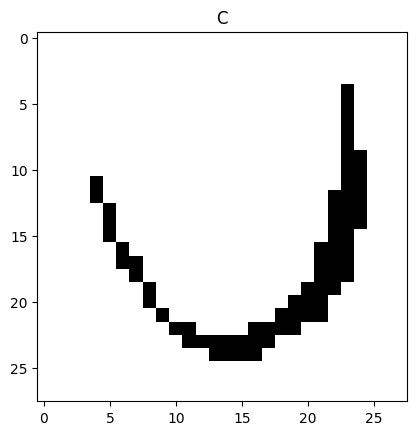

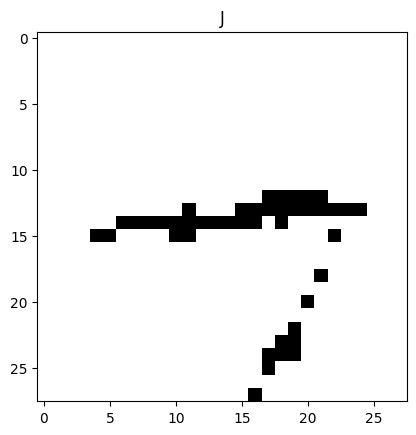

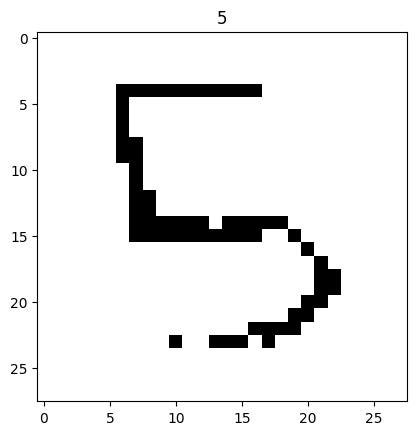

In [6]:
# display the images and preds
for im, pred in zip(arrays, preds):
    plt.figure()
    plt.imshow(im.reshape(28, 28), cmap='gray')
    plt.title(pred)
    plt.show()